# Análise de Regressão do dataset do aerogerador

Será feita uma análise de regressão segundo os modelos de regressão polinômial com graus de 1 até 5, com o objetivo de analisar e comparar a adequação da curva ao sistema real, por meio do coeficiente de determinação e coeficiente de determinação ajustado. 

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Serão usadas as funções criadas para regressão multipla na pasta sctipts

In [27]:
from scripts.multiple_regression import (
    Y_estimator_polinomial as Y_estimator,
    determinition_coefficient,
    adjusted_determinition_coefficient,
    y_mean,
    beta,X_polinomial,Y
)
from scripts.regression_plots import (
    regression_plot,
    save_plot
)

In [28]:
df_aerogerador = pd.read_table('data/aerogerador.dat', sep='\s+', usecols=['velocidade_do_vento', 'potencia_gerada'])

In [29]:
df_aerogerador

,velocidade_do_vento,potencia_gerada
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
2245,14.0,508
2246,14.0,508
2247,14.1,508
2248,14.3,508


Definindo as variáveis $x_i$ e $y_i$, com $i = 1,2,\ldots,n$, do dataset:

In [30]:
x = df_aerogerador['velocidade_do_vento']
y = df_aerogerador['potencia_gerada']

### Gráfico de Dispersão das variaveis $x_i$ e $y_i$ na tabela:

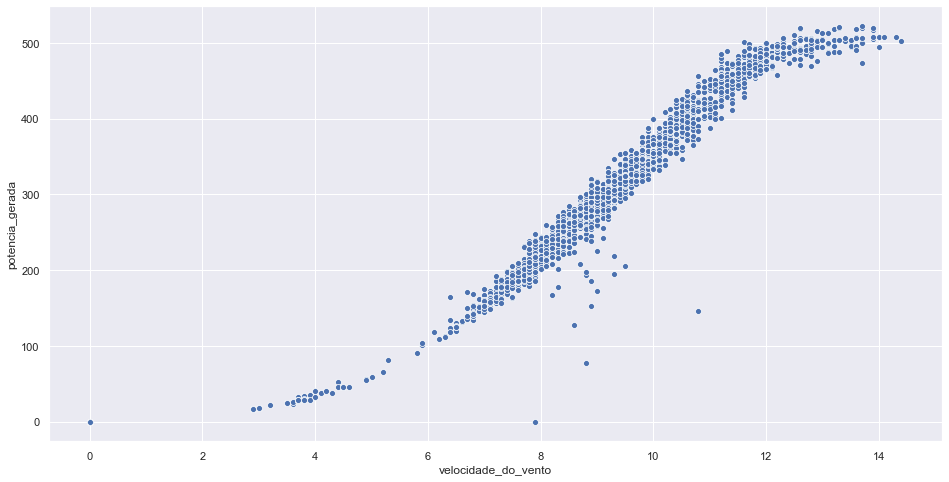

In [31]:
plt.figure(figsize=(16,8))
plot_dispersao = sns.scatterplot(
    x=x,
    y=y,
    data=df_aerogerador
)

In [32]:
save_plot(plot_dispersao,"plots/grafico_dispersao_q1.png")

<hr>

A função `Y_estimator` recebe três parâmetros, as variáveis de regressão $x_i$, as variáveis dependentes $y_i$ e o grau do polinômio que desejamos gerar, e é responsável por obter o vetor $\hat{Y}$, que são os pontos da curva de regressão resultante. (Verificar código em `/sctipts/multiple_regression.py`)

$$\hat{Y} = \textbf{X}\beta$$
em que $$\textbf{Y} = \begin{bmatrix}
    y_0\\
    y_1\\
    \vdots\\
    y_{n}\\
\end{bmatrix}$$


$$
\textbf{X} = \begin{bmatrix}
    1 & x_0 & x_0^2 & \ldots & x_0^k\\
    1 & x_1 & x_1^2 & \ldots & x_1^k\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & x_{n} & x_{n}^2 & \ldots & x_n^k\\
\end{bmatrix}
$$

e
$$
\beta = \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_k
\end{bmatrix}
$$

## Polinômio de Grau 1

Primeiramente, iremos usar um modelo de regressão linear simples, definindo uma reta, e iremos calcular o coeficiente de determinação, para estimar a adequação da função ao modelo.

In [33]:
matrix_X = X_polinomial(x, grade=1)
matrix_Y = Y(y)

In [34]:
B = beta(matrix_X,matrix_Y)

In [35]:
B

array([[-217.6902791 ],
       [  56.44385545]])

In [36]:
Y_estimated = Y_estimator(x, y, 1)

### Grafico da reta de regressão do polinômio de grau 1

O $\hat\beta$ calculado permite encontrar a função $\hat{y}$, que é a reta estimada de regressão

$$\hat{y} = \beta_0 + \beta_1x$$
$$\hat{y} = -217.6902791 + 56.44385545x$$

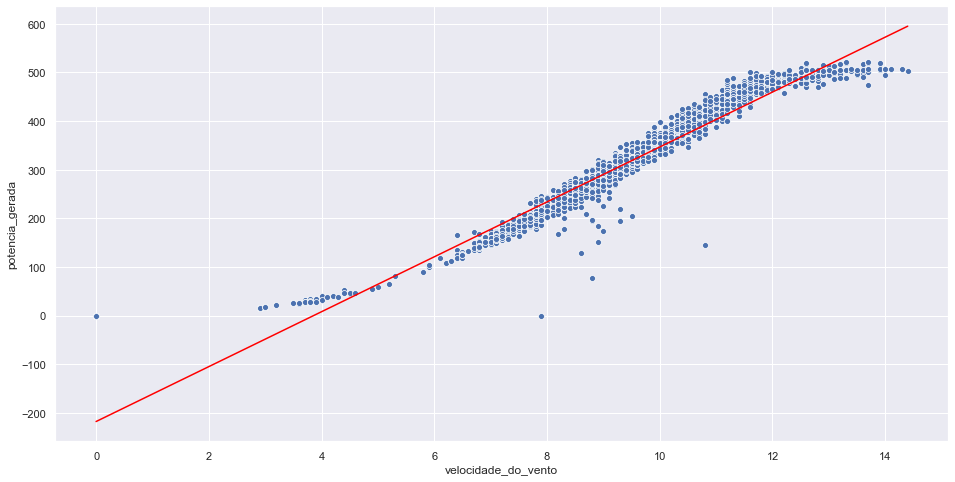

In [37]:
regression_plot(df_aerogerador, x, y, Y_estimated)

<hr>

## Polinômio de Grau 2

In [38]:
Y_estimated_2 = Y_estimator(x, y, 2)

### Grafico da reta de regressão do polinômio de grau 2

Determinaremos a equação da curva da seguinte forma

In [39]:
B_2 = beta(X_polinomial(x, grade=2), Y(y))
B_2

array([[-92.98003005],
       [ 26.72314144],
       [  1.6931193 ]])

O $\hat\beta$ calculado permite encontrar a função $\hat{y}$, que é a curva estimada de regressão

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2$$
$$\hat{y} = -92.98003005 + 26.72314144x + 1.6931193x^2$$

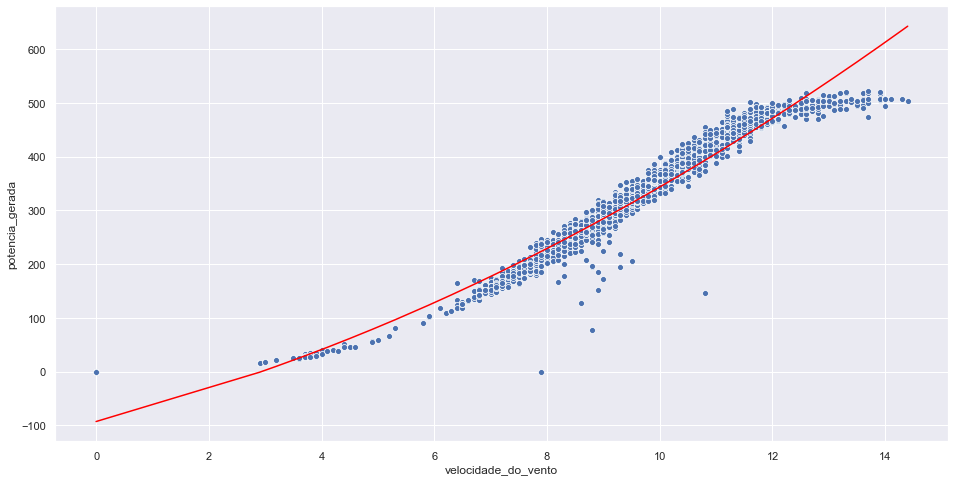

In [40]:
regression_plot(df_aerogerador, x, y, Y_estimated_2)

<hr>

## Polinômio de Grau 3

In [41]:
Y_estimated_3 = Y_estimator(x, y, 3)

In [42]:
B_3 = beta(X_polinomial(x, grade=3), Y(y))
B_3

array([[ 32.62351025],
       [-58.76042398],
       [ 15.05191299],
       [ -0.59240797]])

O $\hat\beta$ calculado permite encontrar a função $\hat{y}$, que é a curva estimada de regressão

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$$
$$\hat{y} = 32.62351025 + -58.76042398x + 15.05191299x^2 + -0.59240797x^3$$

### Grafico da reta de regressão do polinômio de grau 3

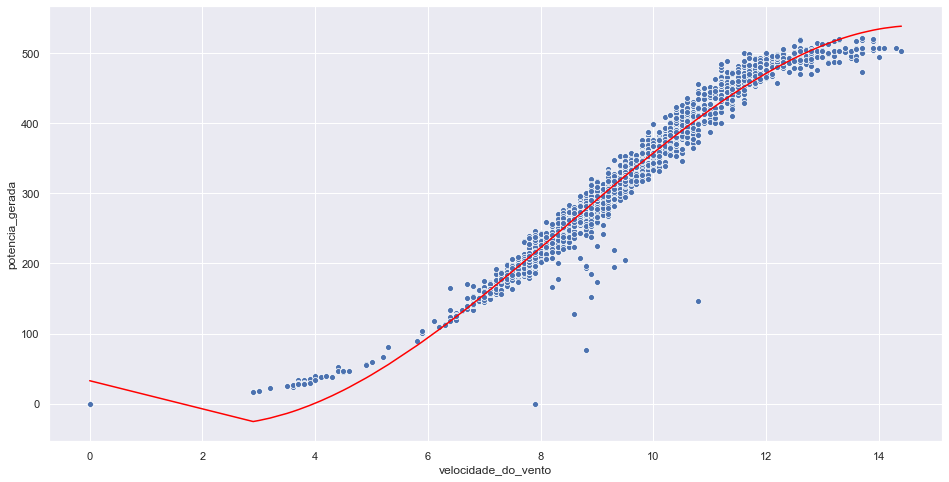

In [43]:
regression_plot(df_aerogerador, x, y, Y_estimated_3)

<hr>

## Polinômio de Grau 4

In [44]:
Y_estimated_4 = Y_estimator(x, y, 4)

In [45]:
B_4 = beta(X_polinomial(x, grade=4), Y(y))
B_4

array([[-0.3913261 ],
       [10.37288673],
       [-5.00359968],
       [ 1.43389503],
       [-0.06766974]])

O $\hat\beta$ calculado permite encontrar a função $\hat{y}$, que é a curva estimada de regressão

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4$$
$$\hat{y} = -0.3913261 + 10.37288673x + -5.00359968x^2 + 1.43389503x3 + -0.06766974x^4$$

### Grafico da reta de regressão do polinômio de grau 4

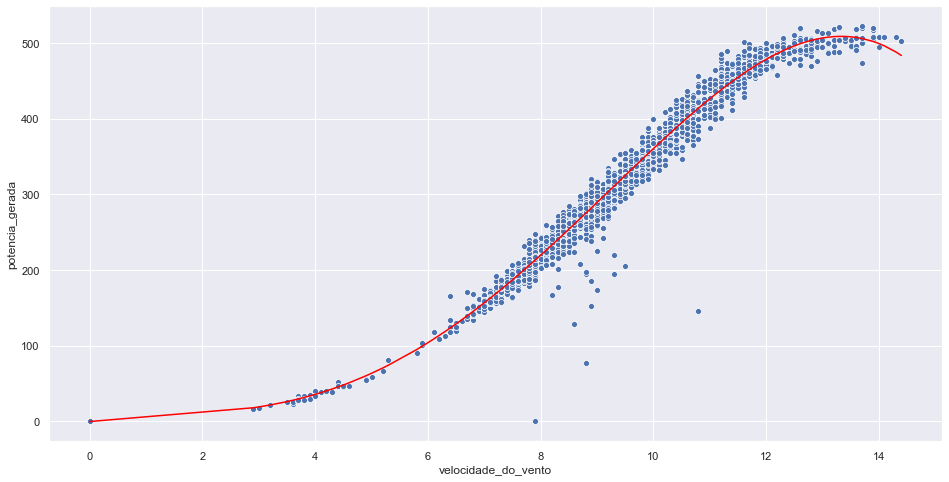

In [46]:
regression_plot(df_aerogerador, x, y, Y_estimated_4)

<hr>

## Polinômio de Grau 5

In [47]:
Y_estimated_5 = Y_estimator(x, y, 5)

In [48]:
B_5 = beta(X_polinomial(x, grade=5), Y(y))
B_5

array([[-1.79826864e-01],
       [ 8.16387638e+00],
       [-3.93045534e+00],
       [ 1.24622594e+00],
       [-5.37024702e-02],
       [-3.75305419e-04]])

O $\hat\beta$ calculado permite encontrar a função $\hat{y}$, que é a curva estimada de regressão

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4 + \beta_5x^5$$
$$\hat{y} = -0.179826864 + 8.16387638x + -3.93045534x^2 + 1.24622594x^3 + -0.0537024702x^4 + -0.000375305419x^5$$

### Grafico da reta de regressão do polinômio de grau 5

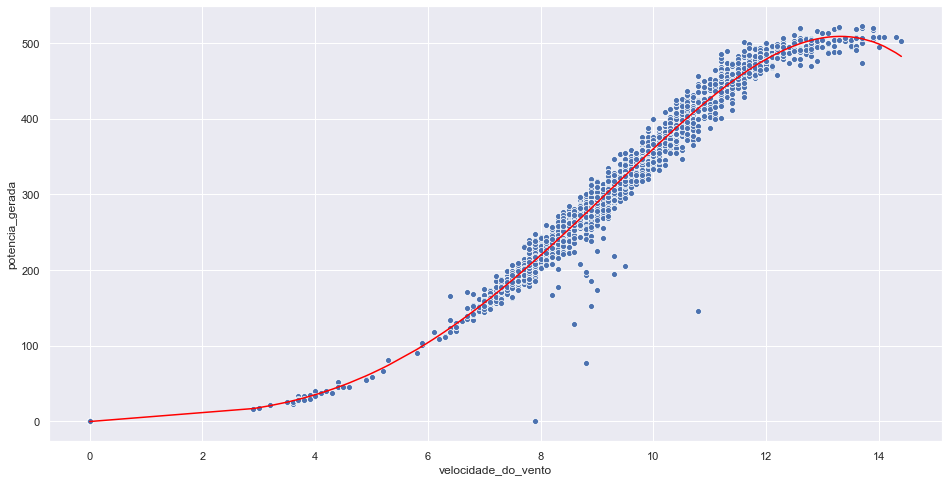

In [49]:
regression_plot(df_aerogerador, x, y, Y_estimated_5)

O que podemos notar é que quanto maior o grau do polinômio do modelo, a curva gerada por ele se aproximará do comportamento real das variáveis amostradas. Porém, vemos também que o modelo de grau 5 não apresenta diferença significante na adequação com relação ao de grau 4. Isso é mostrado no cálculo do coeficiente de adequação ajustado

<hr>

## Coeficiente de Determinação ($R^2$) e Coeficiente de Determinação ajustado ($R_{aj}^2$)

### Para o modelo de grau 1 - Reta

In [50]:
R_2 = determinition_coefficient(y, Y_estimated)
Radj_2 = adjusted_determinition_coefficient(1, y, Y_estimated)

In [51]:
print(f"Coeficiente de Determinação: {R_2}")
print(f"Coeficiente de Determinação ajustado: {Radj_2}")

Coeficiente de Determinação: 0.9291604695978947
Coeficiente de Determinação ajustado: 0.9291289573512745


Apesar de haver modelos melhores para se modelar sobre este sistema, podemos considerar que o modelo linear nos da uma aproximação boa, já que o coeficiente $R^2$ chega a quase 95% (92,91%). Iremos trabalhar agora com o modelo de regressão polinomial de grau maior que 1, que gera uma adequação muito maior.

### Para o modelo de grau 2

In [52]:
R_2_2 = determinition_coefficient(y, Y_estimated_2)
Radj_2_2 = adjusted_determinition_coefficient(2, y, Y_estimated_2)

In [53]:
print(f"Coeficiente de Determinação: {R_2_2}")
print(f"Coeficiente de Determinação ajustado: {Radj_2_2}")

Coeficiente de Determinação: 0.9434238833776912
Coeficiente de Determinação ajustado: 0.9433735263535503


A curva do polinômio de grau 2, ainda não chega a modelar com muita precisão o sistema, mas seu valor de $R^2 \approx 94.3424\%$ e $R_{aj}^2 \approx 94.3373$ são superiores ao nível de adequação da reta com grau 1.

### Para o modelo de grau 3

In [54]:
R_2_3 = determinition_coefficient(y, Y_estimated_3)
Radj_2_3 = adjusted_determinition_coefficient(3, y, Y_estimated_3)

In [55]:
print(f"Coeficiente de Determinação: {R_2_3}")
print(f"Coeficiente de Determinação ajustado: {Radj_2_3}")

Coeficiente de Determinação: 0.9690229223762249
Coeficiente de Determinação ajustado: 0.9689815460481432


O salto dos coeficientes $R^2 \approx 96.9023$ e $ R_{aj}^2 \approx 96.8981$ neste caso dão um salto bastante significativo, de $\approx 2\%$, com relação ao modelo quadrático, vemos no gráfico que a curva já começa a replicar o comportamento real, apesar de ser necessário um grau maior para maior precisão.

### Para o modelo de grau 4

In [56]:
R_2_4 = determinition_coefficient(y, Y_estimated_4)
Radj_2_4 = adjusted_determinition_coefficient(4, y, Y_estimated_4)

In [57]:
print(f"Coeficiente de Determinação: {R_2_4}")
print(f"Coeficiente de Determinação ajustado: {Radj_2_4}")

Coeficiente de Determinação: 0.9737242419030897
Coeficiente de Determinação ajustado: 0.973677425407594


Neste modelo, de grau 4 é que nota-se a maior adequação possível, podendo ser observado no gráfico, que a curva se molda quase com exatidão ao comportamento do sistema real. Observa-se os valores dos dois coeficientes $\big(R^2 = 97.3724$ e $R_{aj}^2 = 97.3677\big)$, também crescem significativamente.

### Para o modelo de grau 5

In [58]:
R_2_5 = determinition_coefficient(y, Y_estimated_5)
Radj_2_5 = adjusted_determinition_coefficient(5, y, Y_estimated_5)

In [59]:
print(f"Coeficiente de Determinação: {R_2_5}")
print(f"Coeficiente de Determinação ajustado: {Radj_2_5}")

Coeficiente de Determinação: 0.9737255940945313
Coeficiente de Determinação ajustado: 0.9736670504093586


Neste caso, vemos que tanto $R^2$, quanto $R_{aj}^2$ não mudam quase nada, e que especificamente $R_{aj}^2$ apresenta uma pequena diminuição na quinta casa decimal, o motivo é que o coeficiente ajustado é melhor para analisar a adequação de modelos regressão multipla.